In [2]:
from vantage6.client import Client
from verticox.client import VerticoxClient
import os
from verticox.config import DOCKER_IMAGE
import matplotlib.pyplot as plt
%matplotlib inline

Get your credentials for the vantage6 server. Here we are taking them from environment
variables but you can replace this with your own credentials.

In [2]:
user = os.environ["V6_USER"]
password = os.environ["V6_PASSWORD"]

## The generic vantage6 client
We need the `vantage6.client.Client` to connect with the vantage6 server.

In [3]:
client = Client("https://v6server.carrier-mu.src.surf-hosted.nl", 443)

 Welcome to
                  _                     __  
                 | |                   / /  
__   ____ _ _ __ | |_ __ _  __ _  ___ / /_  
\ \ / / _` | '_ \| __/ _` |/ _` |/ _ \ '_ \ 
 \ V / (_| | | | | || (_| | (_| |  __/ (_) |
  \_/ \__,_|_| |_|\__\__,_|\__, |\___|\___/ 
                            __/ |           
                           |___/            

 --> Join us on Discord! https://discord.gg/rwRvwyK
 --> Docs: https://docs.vantage6.ai
 --> Blog: https://vantage6.ai
------------------------------------------------------------
Cite us!
If you publish your findings obtained using vantage6, 
please cite the proper sources as mentioned in:
https://vantage6.ai/vantage6/references
------------------------------------------------------------


In [4]:
client.authenticate(user, password)

Authenticating user djura...
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "POST /api/token/user HTTP/1.1" 200 770
Successfully authenticated
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/user/9 | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/user/9 HTTP/1.1" 200 5634
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/organization/2 | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/organization/2 HTTP/1.1" 200 1488
 --> Succesfully authenticated
 --> Name: Djura (id=9)
 --> Organization: djura (id=2)


## End-to-end encryption
This vantage6 installation uses end-to-end encryption. This means that the communication
between nodes is encrypted. Some of this communication is relayed through the vantage6 server but this server can't read this.

In [5]:
client.setup_encryption("private_key.pem")

Loading private key
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/organization/2 | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/organization/2 HTTP/1.1" 200 1488
Public key matches the server key! Good to go!


## Getting you collaboration id
Vantage6 connects organizations together with the concept of _collaborations_.
A collaboration is basically a collection of organizations that are allowed to run algorithms together.

If you're running algorithms you sometimes need to specify your collaboration id. That is why we are retrieving it.

In [6]:
collaborations = client.collaboration.list()

for c in collaborations:
    print(f"Name: {c['name']} id: {c['id']}")

pagination for scope `organization` not available
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/organization/2/collaboration | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/organization/2/collaboration HTTP/1.1" 200 72239
Name: test-infra id: 1


## VerticoxClient
We have created a dedicated client to work with the verticox algorithm more easily.

In [3]:
verticox_client = VerticoxClient(client, image=DOCKER_IMAGE)

NameError: name 'client' is not defined

## Column names
We first need to know the names of the columns at the various datasources.

Whenever we run something on vantage6 we create a task. We can use that task later to get the results back.

In [8]:
task = verticox_client.get_column_names()

Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/node | {'page': 1, 'per_page': 20, 'include': ['metadata'], 'name': None, 'organization_id': None, 'collaboration_id': None, 'ip': None, 'last_seen_from': None, 'last_seen_till': None, 'status': 'online'}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/node?page=1&per_page=20&include=metadata&status=online HTTP/1.1" 200 1525

                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[4, 5, 6],
                                             name=,
                                             image=harbor.carrier-mu.src.surf-hosted.nl/carrier/verticox:test,
                                             description=,
                                             input={'method': 'column_names', 'master': False, 'kwargs': {}},
                                

## Getting results
In the `VerticoxClient`, you can get results by running `task.get_results`

In [9]:
results = task.get_results()
results

--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1540 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1540 HTTP/1.1" 200 1367
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1541 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1541 HTTP/1.1" 200 1367
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1542 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1542 HTTP/1.1" 200 1367
Decryptin

[Result(organization=4, content=['event_happened', 'event_time'], log="/root/.cache/pypoetry/virtualenvs/verticox-9TtSrW0h-py3.10/lib/python3.10/site-packages/vantage6/common/encryption.py:25: CryptographyDeprecationWarning: Use PrivateKeyTypes instead\n  from cryptography.hazmat.primitives.asymmetric.types import PRIVATE_KEY_TYPES\ninfo > wrapper for verticox\ninfo > Reading input file /mnt/data/task-000001540/input\ninfo > Reading token file '/mnt/data/task-000001540/token'\ninfo > Using '/mnt/data/default.parquet' as database\ninfo > Dispatching ...\ninfo > Module 'verticox' imported!\ninfo > Running a regular container\ninfo > Writing output to /mnt/data/task-000001540/output\n"),
 Result(organization=5, content=['age'], log="/root/.cache/pypoetry/virtualenvs/verticox-9TtSrW0h-py3.10/lib/python3.10/site-packages/vantage6/common/encryption.py:25: CryptographyDeprecationWarning: Use PrivateKeyTypes instead\n  from cryptography.hazmat.primitives.asymmetric.types import PRIVATE_KEY_TYP

In [10]:
for r in results:
    print(f"Organization: {r.organization}, Content: {r.content}")

Organization: 4, Content: ['event_happened', 'event_time']
Organization: 5, Content: ['age']
Organization: 6, Content: ['bmi']


## Running cox proportional hazard analysis
If you want to fit a model on the entire dataset you can run `VerticoxClient.fit`

### Docstring
Run cox proportional hazard analysis on the entire dataset.

Args:
- __feature_columns:__ a list of column names that you want to use as features
- __outcome_time_column:__ the column name of the outcome time
- __right_censor_column:__ the column name of the binary value that indicates if an event happened.
- __feature_nodes:__ A list of node ids from the datasources that contain the feature columns
- __outcome_node:__ The node id of the datasource that contains the outcome
- __precision:__ precision of the verticox algorithm. The smaller the number, the more
  precise the result. Smaller precision will take longer to compute though. The default is
  1e-5
- __database:__ If the nodes have multiple datasources, indicate the label of the datasource
  you would like to use. Otherwise the default will be used.
  
  
TODO: hide feature nodes, outcome nodes

In [11]:
task = verticox_client.fit(feature_columns=['age', 'bmi'],
                    outcome_time_column='event_time',
                    right_censor_column='event_happened',
                    feature_nodes=[5,6],
                    outcome_node=4
                   )


                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[4],
                                             name=,
                                             image=harbor.carrier-mu.src.surf-hosted.nl/carrier/verticox:test,
                                             description=,
                                             input={'method': 'fit', 'master': True, 'kwargs': {'feature_columns': ['age', 'bmi'], 'event_times_column': 'event_time', 'event_happened_column': 'event_happened', 'datanode_ids': [5, 6], 'central_node_id': 4, 'precision': 1e-05}},
                                             data_format=json,
                                             database=default
                                             )
            
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/organization/4 | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
htt

In [12]:
results = task.get_results()

--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1543 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1543 HTTP/1.1" 200 1591
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1543 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1543 HTTP/1.1" 200 1591
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1543 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1543 HTTP/1.1" 200 1591
Decryptin

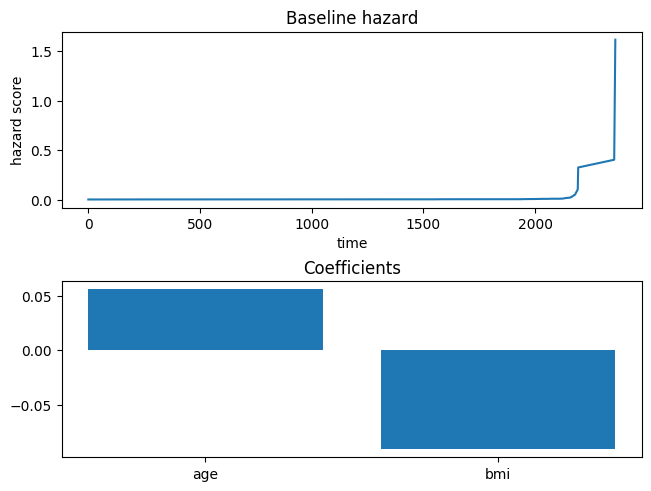

In [14]:
results.plot()

In [21]:
print(results.coefs)
print(results.baseline_hazard.x)
print(results.baseline_hazard.y)

{'age': 0.055669113993644714, 'bmi': -0.09089863300323486}
[1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 42.0, 61.0, 64.0, 88.0, 95.0, 97.0, 100.0, 118.0, 151.0, 192.0, 197.0, 235.0, 297.0, 343.0, 354.0, 422.0, 446.0, 535.0, 612.0, 670.0, 714.0, 849.0, 865.0, 903.0, 905.0, 920.0, 1065.0, 1233.0, 1317.0, 1496.0, 1548.0, 1553.0, 1576.0, 1579.0, 1671.0, 1887.0, 1920.0, 1933.0, 1939.0, 1940.0, 1941.0, 1942.0, 1954.0, 1955.0, 1964.0, 1969.0, 1976.0, 1993.0, 1994.0, 2006.0, 2009.0, 2025.0, 2032.0, 2048.0, 2057.0, 2064.0, 2065.0, 2084.0, 2086.0, 2113.0, 2114.0, 2118.0, 2122.0, 2123.0, 2125.0, 2126.0, 2131.0, 2132.0, 2139.0, 2145.0, 2146.0, 2151.0, 2152.0, 2156.0, 2160.0, 2166.0, 2168.0, 2172.0, 2173.0, 2175.0, 2178.0, 2190.0, 2192.0, 2353.0, 2358.0]
[0.0012652970533598865, 0.0012774381260462209, 0.001363799106126895, 0.0014072088079393344, 0.001448865106989711, 0.0016253721752260706, 0.001677158186291496, 0.0016982819088793223, 0.0017199623148206142, 0.0017270900584180615, 0.0017472795025242015, 0.001760827

## Crossvalidation
It's also possible to run crossvalidation. The parameters are similar to the `fit` method.

In [8]:
crossval_task = verticox_client.cross_validate(feature_columns=['age', 'bmi'],
                    outcome_time_column='event_time',
                    right_censor_column='event_happened',
                    feature_nodes=[5,6],
                    outcome_node=4
                   )


                    task = self.v6client.task.create(collaboration=1,
                                             organizations=[4],
                                             name=,
                                             image=harbor.carrier-mu.src.surf-hosted.nl/carrier/verticox:test,
                                             description=,
                                             input={'method': 'cross_validate', 'master': True, 'kwargs': {'feature_columns': ['age', 'bmi'], 'event_times_column': 'event_time', 'event_happened_column': 'event_happened', 'datanode_ids': [5, 6], 'central_node_id': 4, 'precision': 1e-05}},
                                             data_format=json,
                                             database=default
                                             )
            
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/organization/4 | None
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted

In [10]:
crosval_result = crossval_task.get_results()

--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1561 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1561 HTTP/1.1" 200 1607
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1561 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1561 HTTP/1.1" 200 1607
Decrypting input
Encryption/decryption failed.
--> Attempting to decrypt results!
Making request: GET | https://v6server.carrier-mu.src.surf-hosted.nl:443/api/result/1561 | {}
Starting new HTTPS connection (1): v6server.carrier-mu.src.surf-hosted.nl:443
https://v6server.carrier-mu.src.surf-hosted.nl:443 "GET /api/result/1561 HTTP/1.1" 200 1607
Decryptin

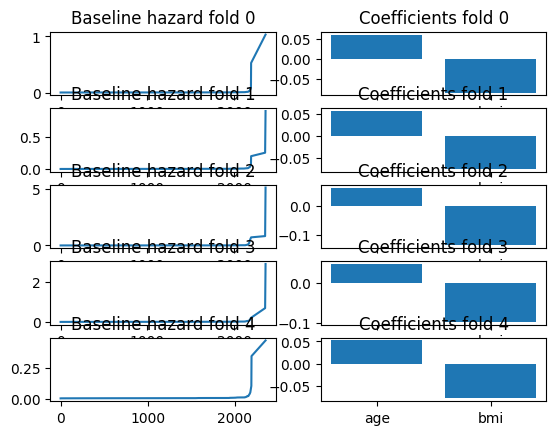

In [13]:
crosval_result.plot()

In [ ]:
# TODO: check std.error